In [6]:
import pandas as pd

#load data
airports=pd.read_csv("data/airports.csv",encoding = "latin1")
events_US=pd.read_csv("data/events_US.csv",encoding = "latin1")
fares=pd.read_csv("data/fares.csv",encoding = "latin1")
flight_traffic=pd.read_csv("data/flight_traffic.csv",encoding = "latin1")
stock_prices=pd.read_csv("data/stock_prices.csv",encoding = "latin1")
weather=pd.read_csv("data/weather.csv",encoding = "latin1")

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster

In [9]:
location = []
lats = []
longs = []
ids = []
for i in range(airports.latitude.size):
    if (~np.isnan(airports.latitude[i])):
        temp = [airports.latitude[i],airports.longitude[i]]
        ids.append(airports.airport_id)
        lats.append(temp[0])
        longs.append(temp[1])
        location.append(temp)

In [10]:
kmeans = cluster.KMeans(n_clusters = 10).fit(location)

In [11]:
plt.scatter(lats, longs, c=kmeans.labels_, cmap='viridis')

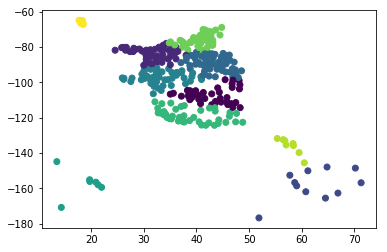

In [12]:
plt.show()

In [32]:
stock_prices.corr()

,AA,UA,B6,OO,AS,NK,WN,DL,HA
AA,1.000000,0.397999,0.626337,0.771373,-0.247823,-0.213474,0.772385,0.953588,-0.432380
UA,0.397999,1.000000,0.768571,-0.060218,0.623239,0.664136,0.505765,0.457156,0.487873
B6,0.626337,0.768571,1.000000,0.205292,0.319107,0.428252,0.643223,0.636877,0.230359
OO,0.771373,-0.060218,0.205292,1.000000,-0.659366,-0.482272,0.587605,0.768054,-0.702924
AS,-0.247823,0.623239,0.319107,-0.659366,1.000000,0.704576,0.004420,-0.182608,0.756895
NK,-0.213474,0.664136,0.428252,-0.482272,0.704576,1.000000,-0.103838,-0.136439,0.862343
WN,0.772385,0.505765,0.643223,0.587605,0.004420,-0.103838,1.000000,0.830354,-0.348522
DL,0.953588,0.457156,0.636877,0.768054,-0.182608,-0.136439,0.830354,1.000000,-0.389394
HA,-0.432380,0.487873,0.230359,-0.702924,0.756895,0.862343,-0.348522,-0.389394,1.000000


In [33]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [40]:
A = stock_prices.corr()

In [41]:
A.AA

AA    1.000000
UA    0.397999
B6    0.626337
OO    0.771373
AS   -0.247823
NK   -0.213474
WN    0.772385
DL    0.953588
HA   -0.432380
Name: AA, dtype: float64

In [43]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


In [57]:
filteredAA = fares.loc[fares['airline_id'] == 'AA']
fares_AA = np.zeros((249,))
for i in range(249):
    fares_AA[i] = filteredAA[str(i+1)+'0'].sum()

filteredUA = fares.loc[fares['airline_id'] == 'UA']
fares_UA = np.zeros((249,))
for i in range(249):
    fares_UA[i] = filteredUA[str(i+1)+'0'].sum()

In [58]:
fares_UA

array([  2.86408000e+05,   3.24244000e+05,   3.54727000e+05,
         3.61941000e+05,   3.63493000e+05,   3.59501000e+05,
         3.51017000e+05,   3.39384000e+05,   3.26935000e+05,
         3.10920000e+05,   2.92652000e+05,   2.83096000e+05,
         2.56051000e+05,   2.48681000e+05,   2.36554000e+05,
         2.21744000e+05,   2.10692000e+05,   1.99841000e+05,
         1.89532000e+05,   1.75942000e+05,   1.64166000e+05,
         1.58617000e+05,   1.47722000e+05,   1.40976000e+05,
         1.35418000e+05,   1.27012000e+05,   1.20409000e+05,
         1.12812000e+05,   1.08142000e+05,   1.03213000e+05,
         9.88630000e+04,   9.45130000e+04,   8.91670000e+04,
         8.50000000e+04,   8.10360000e+04,   7.84260000e+04,
         7.49450000e+04,   6.98920000e+04,   6.61650000e+04,
         6.19790000e+04,   6.12080000e+04,   5.80790000e+04,
         5.45860000e+04,   5.22610000e+04,   4.91980000e+04,
         4.90880000e+04,   4.55550000e+04,   4.36610000e+04,
         4.04570000e+04,